In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg as AR

In [4]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , classification_report , accuracy_score

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("dataset_sdn.csv")
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [7]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [8]:
column_names= df.columns
column_names

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

Null values visualization

Text(0, 0.5, 'count')

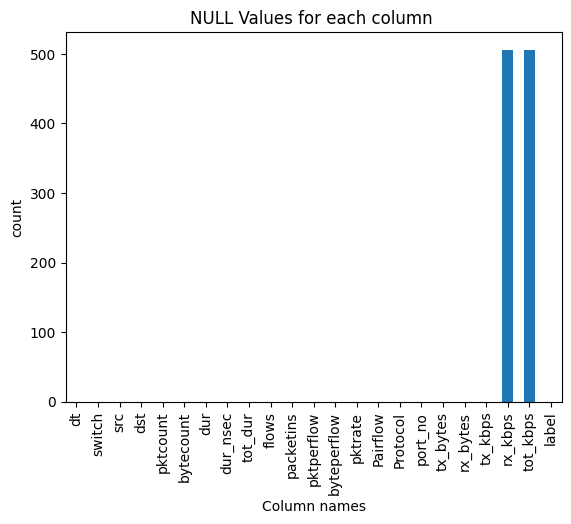

In [9]:
df.isnull().sum().plot.bar()
plt.title("NULL Values for each column ")
plt.xlabel("Column names")
plt.ylabel("count")

Dropping rows with null values

In [10]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-null 

Finding the unique destination values

In [11]:
uniq_dest=df['dst'].unique()
total_dst=len(uniq_dest)
print("Total destination : ", total_dst)
print("Different destination : ", uniq_dest)

Total destination :  18
Different destination :  ['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17' '10.0.0.18']


Doing analysis for normal and malicious traffic

Text(0.5, 1.0, 'Traffic for Normal and Malicious traffic')

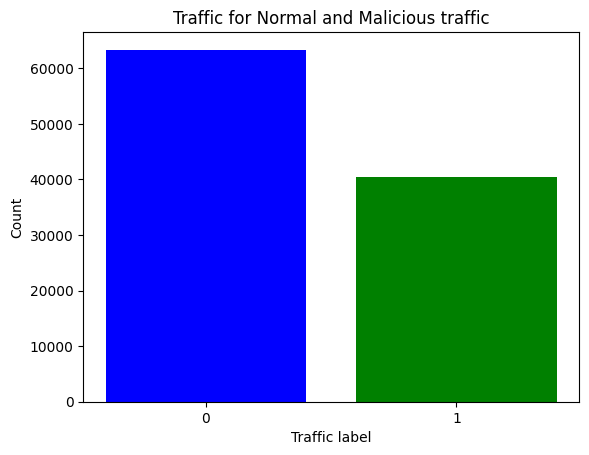

In [12]:
gp=df.groupby('label')['label'].count()
plt.bar(list(gp.index),list(gp.values),color=['b','g'])
plt.xticks(list(gp.index))
plt.xlabel("Traffic label")
plt.ylabel("Count")
plt.title("Traffic for Normal and Malicious traffic")

Text(0.5, 1.0, 'Attack and Normal Traffic')

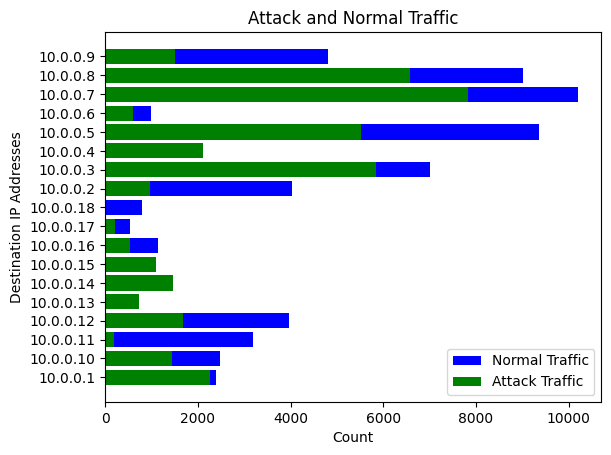

In [13]:
ip_addr=df[df['label']==0].groupby('dst').count()['label'].index
normal_traffic=df.groupby(['dst', 'label']).size().unstack().fillna(0)[0]
attack_traffic=df.groupby(['dst', 'label']).size().unstack().fillna(0)[1]
plt.barh(ip_addr,normal_traffic,color='b', label='Normal Traffic')
plt.barh(ip_addr,attack_traffic,color='g', label='Attack Traffic')
plt.legend()
plt.xlabel("Count")
plt.ylabel("Destination IP Addresses")
plt.title("Attack and Normal Traffic")

Dropping all the Object Type Attributes and separating data based on protocol

In [14]:
object_col= list(df.select_dtypes(include=['object']).columns)
object_col=object_col+['port_no']
print(object_col)
data=df.drop(columns=object_col)

udp_df = df[df['Protocol']=='UDP'].drop(columns=object_col)
tcp_df = df[df['Protocol']=='TCP'].drop(columns=object_col)
icmp_df = df[df['Protocol']=='ICMP'].drop(columns=object_col)
icmp_df

['src', 'dst', 'Protocol', 'port_no']


,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
46116,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,5327,5327,0,0.0,0.0,0
46117,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,5457,3104,0,0.0,0.0,0
46118,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,3227,3185,0,0.0,0.0,0
46119,26657,8,20,1960,21,201000000,2.120100e+10,3,10,0,0,0,1,3357,1122,0,0.0,0.0,0
46120,26657,8,20,1960,21,43000000,2.104300e+10,3,10,0,0,0,1,5327,5327,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,15209,12720,1,1.0,2.0,0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,15099,14693,1,1.0,2.0,0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,3409,3731,0,0.0,0.0,0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,15209,12720,1,1.0,2.0,0


In [15]:
df_s = pd.read_csv("dataset_sdn.csv")
df_s=df_s.drop(["src"],axis=1)
df_s=df_s.drop(["dst"],axis=1)
df_s=df_s.drop(["rx_kbps"],axis=1)
df_s=df_s.drop(["tot_kbps"],axis=1)

In [16]:
# importin modules for train test split
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture

In [17]:
# splitting traing and testing data
udp_train,udp_test, udp_train_label, udp_test_label= train_test_split(udp_df[udp_df.columns[:-1]],udp_df['label'],test_size=0.3,random_state=42)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

UDP

In [19]:
# create regressor object
udp_rf = RandomForestRegressor()

# fit the regressor with x and y data
udp_rf.fit(udp_train,udp_train_label)
predi = udp_rf.predict(udp_test)
accuracy_score(predi.round(), udp_test_label)

1.0

Text(0, 0.5, 'Importance ')

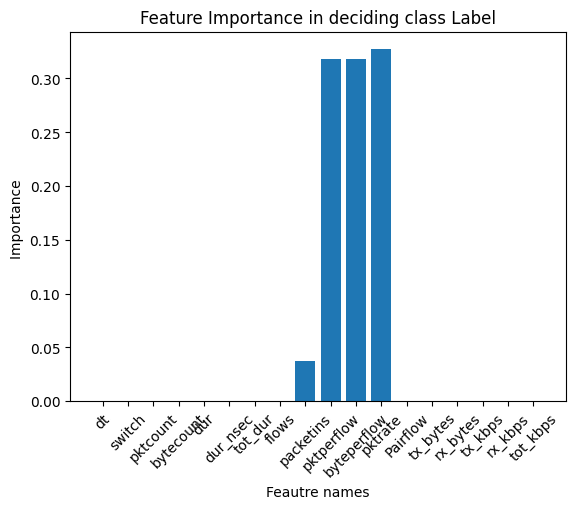

In [20]:
plt.bar(udp_df.columns[:-1], udp_rf.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance in deciding class Label")
plt.xlabel("Feautre names")
plt.ylabel("Importance ")

TCP

In [21]:
# splitting traing and testing data
tcp_train,tcp_test, tcp_train_label, tcp_test_label= train_test_split(tcp_df[tcp_df.columns[:-1]],tcp_df['label'],test_size=0.3,random_state=42)

# create regressor object
tcp_rf = RandomForestRegressor()

# fit the regressor with x and y data
tcp_rf.fit(tcp_train,tcp_train_label)
predi = tcp_rf.predict(tcp_test)
accuracy_score(predi.round(), tcp_test_label)

0.9997735250820972

Text(0, 0.5, 'Importance ')

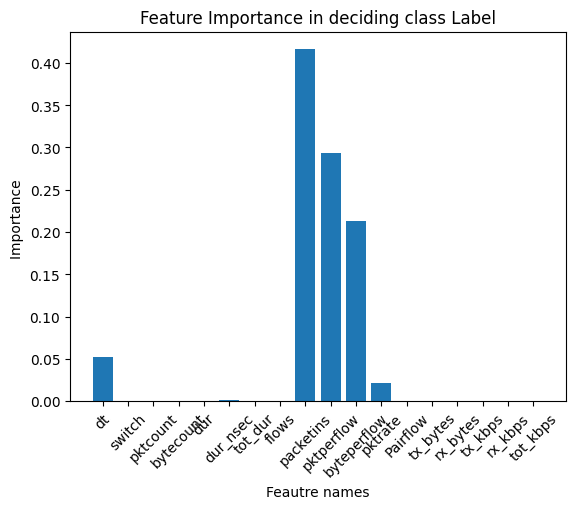

In [22]:
plt.bar(tcp_df.columns[:-1], tcp_rf.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance in deciding class Label")
plt.xlabel("Feautre names")
plt.ylabel("Importance ")

In [23]:
# splitting traing and testing data
icmp_train,icmp_test, icmp_train_label, icmp_test_label= train_test_split(icmp_df[icmp_df.columns[:-1]],icmp_df['label'],test_size=0.3,random_state=42)

# create regressor object
icmp_rf = RandomForestRegressor()

# fit the regressor with x and y data
icmp_rf.fit(icmp_train,icmp_train_label)
accuracy_score(icmp_rf.predict(icmp_test).round(), icmp_test_label)

1.0

Text(0, 0.5, 'Importance ')

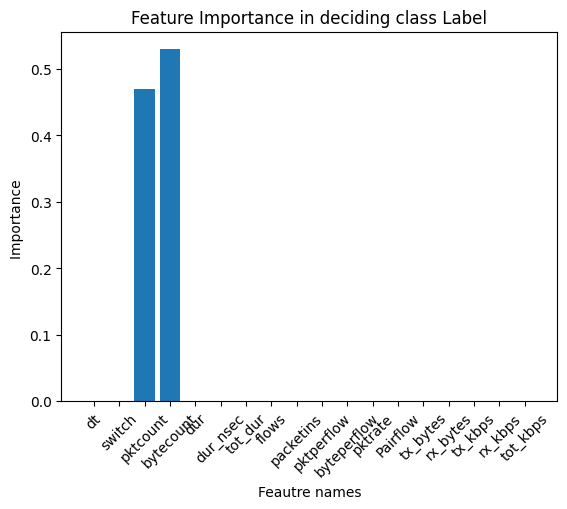

In [24]:
plt.bar(icmp_df.columns[:-1], icmp_rf.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance in deciding class Label")
plt.xlabel("Feautre names")
plt.ylabel("Importance ")

In [25]:
import joblib

# Assuming udp_rf is your RandomForestRegressor model
model_filename = 'random_forest_model.sav'
joblib.dump(udp_rf, model_filename)


['random_forest_model.sav']

In [26]:
udp_rf = joblib.load(model_filename)


In [27]:
# Predict using the loaded model
predictions = udp_rf.predict(udp_test)

# Evaluate the model (use metrics appropriate for your task)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(udp_test_label, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.0


In [28]:
import database
# Save predictions to MySQL database
for actual, predicted in zip(udp_test_label, predictions):
    database.save_predictions(actual, predicted)


In [29]:
def detect(traffic_rate):
    """
    Detects whether the incoming traffic rate suggests a DDoS attack.
    
    :param traffic_rate: Number of requests per second (traffic rate)
    :return: True if DDoS is detected, False otherwise
    """
    threshold = 500  # Set a threshold for DDoS detection
    if traffic_rate > threshold:
        print(f"DDoS attack detected! Traffic rate: {traffic_rate}")
        return True
    else:
        print(f"No DDoS detected. Traffic rate: {traffic_rate}")
        return False
